In [16]:
import geopandas as gpd
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go


In [17]:
# Load earthquake dataset from the Plotly datasets repository
url = 'https://raw.githubusercontent.com/plotly/datasets/master/earthquakes-23k.csv'
earthquakes = pd.read_csv(url)

# Convert the dataframe to a GeoDataFrame with geometry based on Longitude and Latitude
geometry = gpd.points_from_xy(earthquakes['Longitude'], earthquakes['Latitude'])
gdf = gpd.GeoDataFrame(earthquakes, geometry=geometry, crs="EPSG:4326")


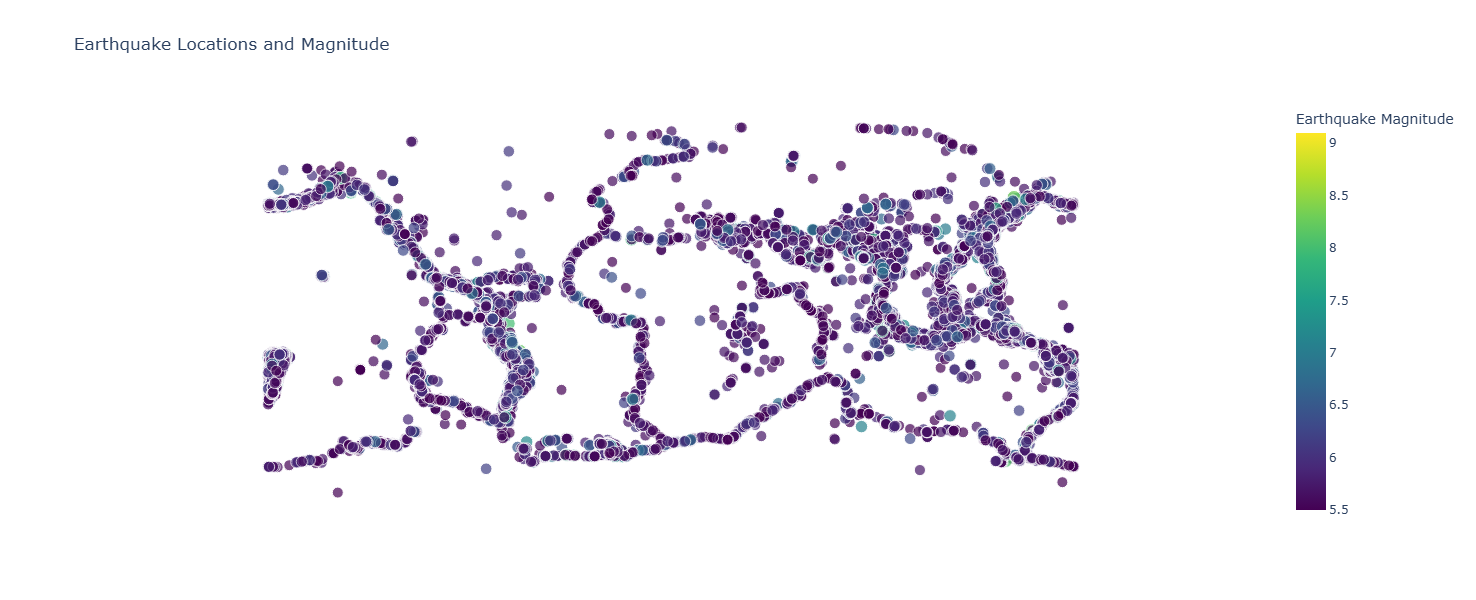

In [18]:
# Create a scatter map for earthquakes with legend for magnitude
fig = px.scatter_geo(gdf, 
                     lon=gdf.geometry.x, 
                     lat=gdf.geometry.y,
                     hover_name="Date",  
                     size="Magnitude",  
                     title="Global Earthquakes Distribution",
                     color="Magnitude",  # Color scale to represent magnitude
                     size_max=10,  # Maximum size for bubbles
                     color_continuous_scale=px.colors.sequential.Viridis,  # Color scale for magnitude
                     labels={'Magnitude':'Earthquake Magnitude'})  # Legend label

fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(height=600, title_text='Earthquake Locations and Magnitude', legend_title="Magnitude")

fig.show()


In [20]:
# Provide the path to the downloaded shapefiles from Natural Earth
shapefile_path = "F:\spatial bigdata"

# Load the Natural Earth dataset from the local path
world = gpd.read_file(shapefile_path)


In [25]:
# Check the columns in the world GeoDataFrame
print(world.columns)


Index(['BUFF_DIST', 'ORIG_FID', 'Shape_Leng', 'Shape_Area', 'geometry'], dtype='object')


C:\Users\baba9\AppData\Local\Temp\ipykernel_13712\2319091227.py:5: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



Index(['pop_est', 'continent', 'name', 'iso_a3', 'gdp_md_est', 'geometry'], dtype='object')


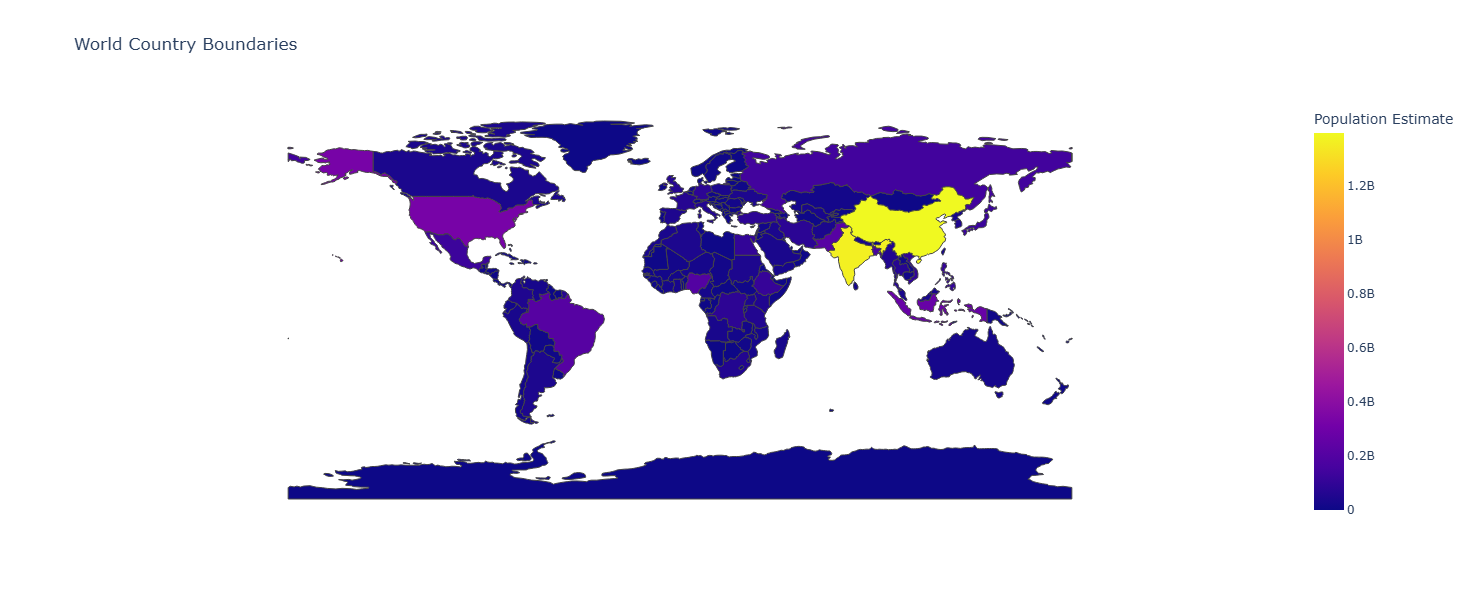

In [30]:
import geopandas as gpd
import plotly.express as px

# Load the built-in Natural Earth dataset
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Check available columns
print(world.columns)

# Create a choropleth map for country boundaries with a legend
fig2 = px.choropleth(
    world,
    geojson=world.geometry.__geo_interface__,  # Use the __geo_interface__ for proper format
    locations=world.index,
    title="World Country Boundaries",
    color="pop_est",  # Use population estimate for color scale
    color_continuous_scale=px.colors.sequential.Plasma,  # Color scale for countries
    labels={'pop_est': 'Population Estimate'}  # Legend label
)

fig2.update_geos(fitbounds="locations", visible=False)
fig2.update_layout(height=600, title_text='World Country Boundaries', legend_title="Population")

fig2.show()
